In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from matplotlib.collections import PatchCollection
import seaborn as sns
import numpy as np

In [2]:
# read in data
fst = pd.read_csv('ntII_ntIIIa_500kb10kb_90missing_mac21.windowed.weir.fst', sep ="\t")
# add information on mid point
fst['MID']=fst['BIN_END']-250000
num = fst['MEAN_FST']
num[num < 0] = 0
fst.head()

/home/jillolofsson/miniconda2/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CHROM,BIN_START,BIN_END,N_VARIANTS,WEIGHTED_FST,MEAN_FST,MID
0,Chromosome_7,1,500000,4,0.715489,0.6951,250000
1,Chromosome_7,10001,510000,4,0.715489,0.6951,260000
2,Chromosome_7,20001,520000,4,0.715489,0.6951,270000
3,Chromosome_7,30001,530000,4,0.715489,0.6951,280000
4,Chromosome_7,40001,540000,4,0.715489,0.6951,290000


In [3]:
# Import things needed to plot in one figure
    # chromosomes
bed =pd.read_csv('chr.bed', sep="\t")
chrLengs=bed['end']
chrGap= 10000000
    # genes
genes =pd.read_csv('all_genes_plotted.txt', sep="\t")
#add info for plotting, i.e. how much to add to each side of the gene to make 1 Mb plots
genes['z']=250000+((500000+genes['Start']-genes['Stop'])/2)

In [4]:
# fix the positions
pos_add=[]

for row in fst['CHROM']:
    if row=='Chromosome_1':
        pos_add.append(0)
    elif row=='Chromosome_2':
        pos_add.append(np.cumsum(chrLengs)[0]+chrGap*1)
    elif row=='Chromosome_3':
        pos_add.append(np.cumsum(chrLengs)[1]+chrGap*2)
    elif row=='Chromosome_4':
        pos_add.append(np.cumsum(chrLengs)[2]+chrGap*3)
    elif row=='Chromosome_5':
        pos_add.append(np.cumsum(chrLengs)[3]+chrGap*4)
    elif row=='Chromosome_6':
        pos_add.append(np.cumsum(chrLengs)[4]+chrGap*5)
    elif row=='Chromosome_7':
        pos_add.append(np.cumsum(chrLengs)[5]+chrGap*6)
    elif row=='Chromosome_8':
        pos_add.append(np.cumsum(chrLengs)[6]+chrGap*7)
    elif row=='Chromosome_9':
        pos_add.append(np.cumsum(chrLengs)[7]+chrGap*8)
    else:
        pos_add.append(0)
fst['pos_add']=pos_add
fst['pos_fixed']=fst['MID']+fst['pos_add']
fst.head()

,CHROM,BIN_START,BIN_END,N_VARIANTS,WEIGHTED_FST,MEAN_FST,MID,pos_add,pos_fixed
0,Chromosome_7,1,500000,4,0.715489,0.6951,250000,539739079,539989079
1,Chromosome_7,10001,510000,4,0.715489,0.6951,260000,539739079,539999079
2,Chromosome_7,20001,520000,4,0.715489,0.6951,270000,539739079,540009079
3,Chromosome_7,30001,530000,4,0.715489,0.6951,280000,539739079,540019079
4,Chromosome_7,40001,540000,4,0.715489,0.6951,290000,539739079,540029079


In [5]:
# add colour
col_add=[]

for row in fst['CHROM']:
    if row=='Chromosome_1':
        col_add.append('lightgrey')
    elif row=='Chromosome_2':
        col_add.append('darkgrey')
    elif row=='Chromosome_3':
        col_add.append('lightgrey')
    elif row=='Chromosome_4':
        col_add.append('darkgrey')
    elif row=='Chromosome_5':
        col_add.append('lightgrey')
    elif row=='Chromosome_6':
        col_add.append('darkgrey')
    elif row=='Chromosome_7':
        col_add.append('lightgrey')
    elif row=='Chromosome_8':
        col_add.append('darkgrey')
    elif row=='Chromosome_9':
        col_add.append('lightgrey')
    else:
        col_add.append('blue')
fst['col']=col_add
fst.head()

,CHROM,BIN_START,BIN_END,N_VARIANTS,WEIGHTED_FST,MEAN_FST,MID,pos_add,pos_fixed,col
0,Chromosome_7,1,500000,4,0.715489,0.6951,250000,539739079,539989079,lightgrey
1,Chromosome_7,10001,510000,4,0.715489,0.6951,260000,539739079,539999079,lightgrey
2,Chromosome_7,20001,520000,4,0.715489,0.6951,270000,539739079,540009079,lightgrey
3,Chromosome_7,30001,530000,4,0.715489,0.6951,280000,539739079,540019079,lightgrey
4,Chromosome_7,40001,540000,4,0.715489,0.6951,290000,539739079,540029079,lightgrey


In [6]:
# find min and max number of variants
def minmax(data):
    min=data.min()
    max=data.max()
    return (min, max)
minmax(fst['N_VARIANTS'])
# (1, 198)

(1, 198)

In [7]:
# import null distribution file
null=pd.read_csv('ntIIntIIIa_fst_null_dist.txt', sep="\t")
null.head()

,1,2,3,4,5,6,7,8,9,10,...,189,190,191,192,193,194,195,196,197,198
0,0.093776,0.096274,0.189490,0.486629,0.119443,0.375317,0.381762,0.469336,0.423221,0.509181,...,0.404754,0.456208,0.464316,0.407772,0.428228,0.421460,0.372547,0.451129,0.463758,0.393045
1,0.385057,0.253698,0.243640,0.499521,0.450404,0.313862,0.318669,0.333889,0.440250,0.471309,...,0.419816,0.417426,0.448675,0.391743,0.414765,0.424636,0.449806,0.407392,0.407226,0.441018
2,0.000000,0.245800,0.452641,0.309713,0.320308,0.356808,0.210718,0.267373,0.216906,0.306180,...,0.430898,0.397186,0.377806,0.474323,0.393497,0.392860,0.440553,0.410099,0.401566,0.454523
3,0.114657,0.382444,0.199030,0.323558,0.178587,0.196221,0.298299,0.468994,0.571601,0.362244,...,0.434398,0.395212,0.427664,0.395852,0.403561,0.379657,0.432696,0.417313,0.398113,0.436405
4,0.500000,0.086860,0.171632,0.127384,0.380756,0.378777,0.430739,0.488014,0.234374,0.350568,...,0.392422,0.425272,0.379447,0.436606,0.390638,0.380051,0.427618,0.465712,0.455496,0.390907


In [8]:
var=list(range(1,199))
var=[str(i)for i in var]
len(var)

198

In [9]:
def u_outlier(data, threshold=99):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (maxval)
def low_outlier(data, threshold=99):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (minval)

In [10]:
u_out=[]
for i in var:
    u_out.append(u_outlier(null[i]))
#
l_out=[]
for i in var:
    l_out.append(low_outlier(null[i]))

In [11]:
out_cutoff=pd.DataFrame()
out_cutoff['N_VAR']=var
out_cutoff['u_out']=u_out
out_cutoff['l_out']=l_out
out_cutoff.head()

,N_VAR,u_out,l_out
0,1,0.500000,0.000000
1,2,0.657350,0.000000
2,3,0.694320,0.019889
3,4,0.693442,0.047004
4,5,0.702123,0.089626


In [12]:
out_cutoff['u_out'].min()

0.479401059645

In [13]:
out_cutoff['l_out'].max()

0.36810976789

In [14]:
# take out upper significance values
fst_usig=fst[fst.MEAN_FST > out_cutoff['u_out'].min()]
col_add_outlier=['darkgrey']*len(fst_usig)
fst_usig.head()

,CHROM,BIN_START,BIN_END,N_VARIANTS,WEIGHTED_FST,MEAN_FST,MID,pos_add,pos_fixed,col
0,Chromosome_7,1,500000,4,0.715489,0.6951,250000,539739079,539989079,lightgrey
1,Chromosome_7,10001,510000,4,0.715489,0.6951,260000,539739079,539999079,lightgrey
2,Chromosome_7,20001,520000,4,0.715489,0.6951,270000,539739079,540009079,lightgrey
3,Chromosome_7,30001,530000,4,0.715489,0.6951,280000,539739079,540019079,lightgrey
4,Chromosome_7,40001,540000,4,0.715489,0.6951,290000,539739079,540029079,lightgrey


In [15]:
# change the colour to orange if above the significance level
for n in range(0, len(fst_usig)):
    for j in range(0,len(out_cutoff)):
        if str(fst_usig.iloc[n]['N_VARIANTS'])==out_cutoff.iloc[j]['N_VAR'] and fst_usig.iloc[n]['MEAN_FST'] > out_cutoff.iloc[j]['u_out']:
            col_add_outlier[n]='orange'
# add colour
fst_usig['colout']=col_add_outlier
fst_usig.head()

/home/jillolofsson/miniconda2/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,CHROM,BIN_START,BIN_END,N_VARIANTS,WEIGHTED_FST,MEAN_FST,MID,pos_add,pos_fixed,col,colout
0,Chromosome_7,1,500000,4,0.715489,0.6951,250000,539739079,539989079,lightgrey,orange
1,Chromosome_7,10001,510000,4,0.715489,0.6951,260000,539739079,539999079,lightgrey,orange
2,Chromosome_7,20001,520000,4,0.715489,0.6951,270000,539739079,540009079,lightgrey,orange
3,Chromosome_7,30001,530000,4,0.715489,0.6951,280000,539739079,540019079,lightgrey,orange
4,Chromosome_7,40001,540000,4,0.715489,0.6951,290000,539739079,540029079,lightgrey,orange


In [16]:
outliers=fst_usig[fst_usig['colout']=='orange']
len(outliers)

12033

In [17]:
#pd.DataFrame.to_csv(outliers, 'fst_upper_out.txt', sep="\t", index=False)
pd.DataFrame.to_csv(outliers, 'fst_upper_out2.txt', sep="\t", index=False)

In [18]:
# take out lower significance values
fst_lsig=fst[fst.MEAN_FST < out_cutoff['l_out'].max()]
col_add_l_outlier=['darkgrey']*len(fst_lsig)
fst_lsig.head()
len(fst_lsig)

17768

In [19]:
# change the colour to blue if below the significance level
for n in range(0, len(fst_lsig)):
    for j in range(0,len(out_cutoff)):
        if str(fst_lsig.iloc[n]['N_VARIANTS'])==out_cutoff.iloc[j]['N_VAR'] and fst_lsig.iloc[n]['MEAN_FST'] < out_cutoff.iloc[j]['l_out']:
            col_add_l_outlier[n]='blue'
# add colour
fst_lsig['colout']=col_add_l_outlier
fst_lsig.head()

/home/jillolofsson/miniconda2/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,CHROM,BIN_START,BIN_END,N_VARIANTS,WEIGHTED_FST,MEAN_FST,MID,pos_add,pos_fixed,col,colout
72,Chromosome_7,720001,1220000,9,0.377976,0.319219,970000,539739079,540709079,lightgrey,darkgrey
73,Chromosome_7,730001,1230000,9,0.377976,0.319219,980000,539739079,540719079,lightgrey,darkgrey
74,Chromosome_7,740001,1240000,9,0.377976,0.319219,990000,539739079,540729079,lightgrey,darkgrey
75,Chromosome_7,750001,1250000,9,0.377976,0.319219,1000000,539739079,540739079,lightgrey,darkgrey
76,Chromosome_7,760001,1260000,9,0.377976,0.319219,1010000,539739079,540749079,lightgrey,darkgrey


In [20]:
outliers2=fst_lsig[fst_lsig['colout']=='blue']
len(outliers2)

4503

In [21]:
#pd.DataFrame.to_csv(outliers2, 'fst_lower_out.txt', sep="\t", index=False)
pd.DataFrame.to_csv(outliers2, 'fst_lower_out2.txt', sep="\t", index=False)

In [22]:
# take out all the non-significant values
fst_nonsig=fst[fst.MEAN_FST < out_cutoff['u_out'].min()]
fst_nonsig=fst_nonsig[fst_nonsig.MEAN_FST > out_cutoff['l_out'].max()]
fst_nonsig.head()
len(fst_nonsig)

27079

In [23]:
# add an outlier colour column to the non-sig once
fst_nonsig['colout']="darkgrey"
fst_nonsig.head()

,CHROM,BIN_START,BIN_END,N_VARIANTS,WEIGHTED_FST,MEAN_FST,MID,pos_add,pos_fixed,col,colout
63,Chromosome_7,630001,1130000,13,0.568967,0.471501,880000,539739079,540619079,lightgrey,darkgrey
64,Chromosome_7,640001,1140000,13,0.568967,0.471501,890000,539739079,540629079,lightgrey,darkgrey
65,Chromosome_7,650001,1150000,13,0.568967,0.471501,900000,539739079,540639079,lightgrey,darkgrey
66,Chromosome_7,660001,1160000,13,0.568967,0.471501,910000,539739079,540649079,lightgrey,darkgrey
67,Chromosome_7,670001,1170000,13,0.568967,0.471501,920000,539739079,540659079,lightgrey,darkgrey


In [24]:
# add the data frames together
fst2=pd.concat([fst_nonsig, fst_usig, fst_lsig])
#sort the data frame
fst2=fst2.sort_values(by=['CHROM','pos_fixed'])
fst2.head()

,CHROM,BIN_START,BIN_END,N_VARIANTS,WEIGHTED_FST,MEAN_FST,MID,pos_add,pos_fixed,col,colout
16194,Chromosome_1,1,500000,18,0.476881,0.337704,250000,0,250000,lightgrey,darkgrey
16195,Chromosome_1,10001,510000,18,0.476881,0.337704,260000,0,260000,lightgrey,darkgrey
16196,Chromosome_1,20001,520000,18,0.476881,0.337704,270000,0,270000,lightgrey,darkgrey
16197,Chromosome_1,30001,530000,18,0.476881,0.337704,280000,0,280000,lightgrey,darkgrey
16198,Chromosome_1,40001,540000,18,0.476881,0.337704,290000,0,290000,lightgrey,darkgrey


In [25]:
#pd.DataFrame.to_csv(fst2, 'ntIIntIII_fst_fixed.txt', sep="\t", index=False)
pd.DataFrame.to_csv(fst2, 'ntIIntIII_fst_fixed2.txt', sep="\t", index=False)

In [6]:
fst=pd.read_csv('ntIIntIII_fst_fixed2.txt', sep="\t")
fst.head()

,CHROM,BIN_START,BIN_END,N_VARIANTS,WEIGHTED_FST,MEAN_FST,MID,pos_add,pos_fixed,col,colout
0,Chromosome_1,1,500000,18,0.476881,0.337704,250000,0,250000,lightgrey,darkgrey
1,Chromosome_1,10001,510000,18,0.476881,0.337704,260000,0,260000,lightgrey,darkgrey
2,Chromosome_1,20001,520000,18,0.476881,0.337704,270000,0,270000,lightgrey,darkgrey
3,Chromosome_1,30001,530000,18,0.476881,0.337704,280000,0,280000,lightgrey,darkgrey
4,Chromosome_1,40001,540000,18,0.476881,0.337704,290000,0,290000,lightgrey,darkgrey


In [7]:
out_overlap=pd.read_csv('fst_dxy_overlapp_simple_20200427.txt', sep="\t")
out_overlap.head()

,CHROM,BIN_START,BIN_END,N_VARIANTS,WEIGHTED_FST,MEAN_FST,MID,pos_add,pos_fixed,col,colout_fst,chr,pos,dxy,pos_add.1,pos_fixed.1,col.1,colout_dxy,colout_overlap
0,Chromosome_1,20200001,20700000,45,0.684735,0.572022,20450000,0,20450000,lightgrey,orange,Chromosome_1,20450001,0.024607,0,20450001,lightgrey,orange,red
1,Chromosome_1,20210001,20710000,45,0.684735,0.572022,20460000,0,20460000,lightgrey,orange,Chromosome_1,20460001,0.024607,0,20460001,lightgrey,orange,red
2,Chromosome_1,20220001,20720000,45,0.684735,0.572022,20470000,0,20470000,lightgrey,orange,Chromosome_1,20470001,0.024607,0,20470001,lightgrey,orange,red
3,Chromosome_1,20230001,20730000,45,0.684735,0.572022,20480000,0,20480000,lightgrey,orange,Chromosome_1,20480001,0.024607,0,20480001,lightgrey,orange,red
4,Chromosome_1,20240001,20740000,47,0.674176,0.561399,20490000,0,20490000,lightgrey,orange,Chromosome_1,20490001,0.024150,0,20490001,lightgrey,orange,red


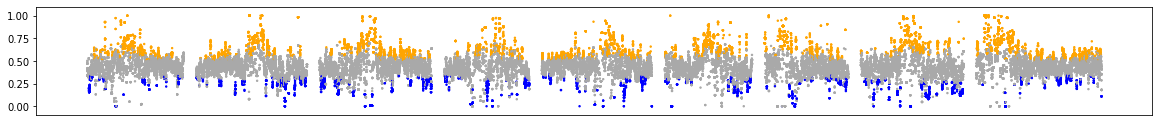

In [15]:
#plot
plt.figure(figsize=(20,2))
plt.ylim(-0.1,1.1)
plt.xticks([])
plt.scatter(fst['pos_fixed'], 
            fst['MEAN_FST'],
            c=fst['colout'],s=2)
#plt.scatter(out_overlap['pos_fixed'], 
#            out_overlap['MEAN_FST'],
#            c=out_overlap['colout_overlapp'],s=2)

In [44]:
# get the average:
m=np.mean(fst['MEAN_FST'])
l=np.percentile(fst['MEAN_FST'], 5)
u=np.percentile(fst['MEAN_FST'], 95)
print(m, l, u)
#0.4512450884742464 0.23613270000000003 0.705589

0.4512450884742464 0.23613270000000003 0.705589


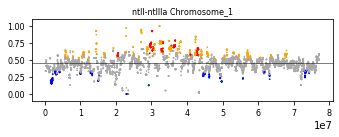

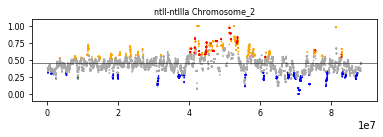

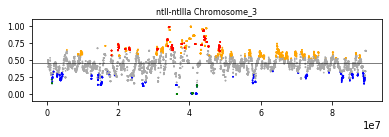

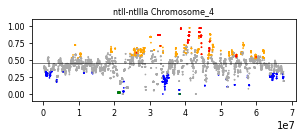

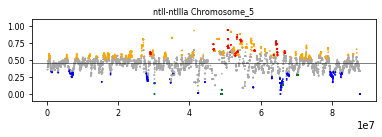

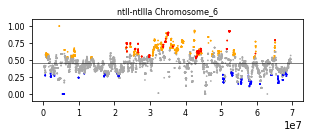

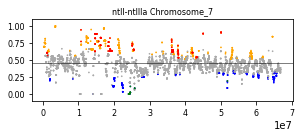

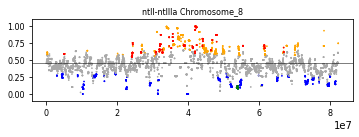

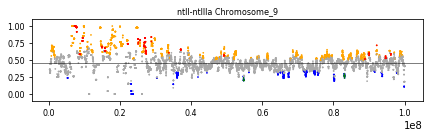

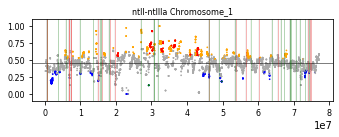

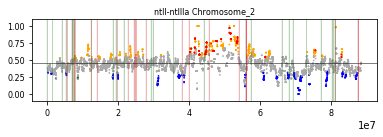

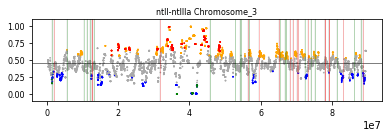

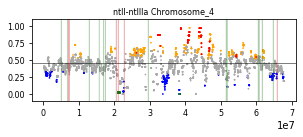

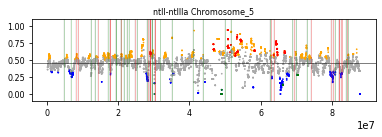

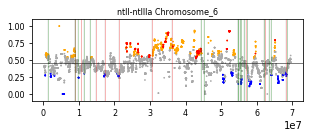

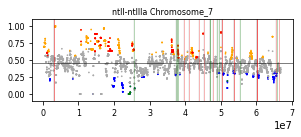

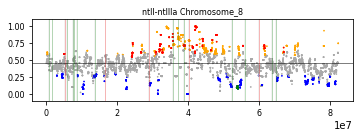

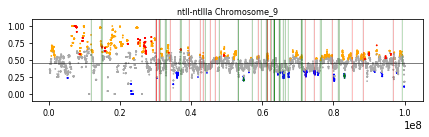

In [16]:
#plot all chromosomes
#define sizes of figures
figsize=(5.39,6.18,6.27,4.73,6.16,4.86,4.67,5.75,7)
# define the chromosomes
chrs=('Chromosome_1','Chromosome_2','Chromosome_3','Chromosome_4','Chromosome_5',
    'Chromosome_6','Chromosome_7','Chromosome_8','Chromosome_9')
#title of the plot
header='ntII-ntIIIa '

#plot all chromosomes with all the Fst-dxy overlap outliers
for size, chrom in zip(figsize, chrs):
    plt.figure(figsize=(size,1.5))
    plt.ylim(-0.1,1.1)
    title=header+str(chrom)
    plt.title(title, fontsize=8)
    ax = plt.gca()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 6)
    plt.axhline(y=fst['MEAN_FST'].mean(), c='black', linewidth=0.5)
        #add the Fst data with the outliers colored
    plt.scatter(fst.loc[fst['CHROM']==str(chrom),'MID'],
                fst.loc[fst['CHROM']==str(chrom), 'MEAN_FST'],
                c=fst.loc[fst['CHROM']==str(chrom), 'colout'],s=0.5)
        #add the points with overlap in dxy ontop
    plt.scatter(out_overlap.loc[out_overlap['CHROM']==str(chrom),'pos'],
                out_overlap.loc[out_overlap['CHROM']==str(chrom),'MEAN_FST'],
                c=out_overlap.loc[out_overlap['CHROM']==str(chrom),'colout_overlap'],s=0.5)
    name=str(chrom)+'_ntII-ntIIIa_500kb10kb_90missing_mac21_outoverlap.png'
    plt.savefig(name, dpi=1200)
    
#plot all chromosomes with all the Fst-dxy overlap outliers and all genes and the boxes around the genes
for size, chrom in zip(figsize, chrs):
    plt.figure(figsize=(size,1.5))
    plt.ylim(-0.1,1.1)
    title=header+str(chrom)
    plt.title(title, fontsize=8)
    ax = plt.gca()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 6)
    plt.axhline(y=fst['MEAN_FST'].mean(), c='black', linewidth=0.5)
        #add the Fst data with the outliers colored
    plt.scatter(fst.loc[fst['CHROM']==str(chrom),'MID'],
                fst.loc[fst['CHROM']==str(chrom), 'MEAN_FST'],
                c=fst.loc[fst['CHROM']==str(chrom), 'colout'],s=0.5)
        #add the points with overlap in dxy ontop
    plt.scatter(out_overlap.loc[out_overlap['CHROM']==str(chrom),'pos'],
                out_overlap.loc[out_overlap['CHROM']==str(chrom),'MEAN_FST'],
                c=out_overlap.loc[out_overlap['CHROM']==str(chrom),'colout_overlap'],s=0.5)
        # add the genes
    for mid,col in zip(genes.loc[genes['Chr']==str(chrom),'Mid'],genes.loc[genes['Chr']==str(chrom),'color']):
        plt.axvline(x=mid, c=col, linewidth=0.5,alpha=0.5)
        # add the poxes
            # define the list of paths
    geneboxes1 = []
            # make the paths
    for start, stop in zip(genes.loc[genes['Chr']==str(chrom),'Start'],
                           genes.loc[genes['Chr']==str(chrom),'Stop']):
        rect = pat.Rectangle(xy=(start-250000,-0.1),width=stop-start+500000,height=1.2,facecolor='grey', 
                         edgecolor='None', alpha=0.1)
        geneboxes1.append(rect)
            #add the poxes
    for i in geneboxes1:
        ax.add_patch(i)
        #name the plot and save
    name=str(chrom)+'_ntII-ntIIIa_500kb10kb_90missing_mac21_outoverlap_allgenes.png'
    plt.savefig(name, dpi=1200)

In [17]:
%%capture
# plot all genes in 1 Mb plots with the boxes around the genes
# define the chromosomes
chrs=('Chromosome_1','Chromosome_2','Chromosome_3','Chromosome_4','Chromosome_5',
    'Chromosome_6','Chromosome_7','Chromosome_8','Chromosome_9')
#title of the plot
header='ntII-ntIIIa '

for chrom in chrs:
        #take out the genes for the chromosome
    g=genes.loc[genes['Chr']==str(chrom),]
        #take out the locations of the xlim for each genes plot and make a dataframe
    d={'start':genes.loc[genes['Chr']==str(chrom),'Start']-genes.loc[genes['Chr']==str(chrom),'z'], 
        'stop':genes.loc[genes['Chr']==str(chrom),'Stop']+genes.loc[genes['Chr']==str(chrom),'z']}
    mbplots=pd.DataFrame(data=d)
    
        # title for each plot
    title=header+str(chrom)
    for x, y, z in zip(mbplots['start'],mbplots['stop'], range(1,len(g.index)+1)):
        plt.figure(figsize=(2,1.5))
        plt.ylim(-0.1,1.1)
        plt.xlim(x,y)
        plt.title(title, fontsize=8)
        ax = plt.gca()
        ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 6)
        plt.axhline(y=fst['MEAN_FST'].mean(), c='black', linewidth=0.5)
            #add the Fst data with the outliers colored
        plt.scatter(fst.loc[fst['CHROM']==str(chrom),'MID'],
                    fst.loc[fst['CHROM']==str(chrom), 'MEAN_FST'],
                    c=fst.loc[fst['CHROM']==str(chrom), 'colout'],s=0.5)
            #add the points with overlap in dxy ontop
        plt.scatter(out_overlap.loc[out_overlap['CHROM']==str(chrom),'pos'],
                    out_overlap.loc[out_overlap['CHROM']==str(chrom),'MEAN_FST'],
                    c=out_overlap.loc[out_overlap['CHROM']==str(chrom),'colout_overlap'],s=0.5)
            # add the genes
        for mid,col in zip(g['Mid'],g['color']):
            plt.axvline(x=mid, c=col, linewidth=0.5,alpha=0.5)
            # add the poxes
                # define the list of paths
        geneboxes1 = []
                # make the paths
        for start, stop in zip(g['Start'],g['Stop']):
            rect = pat.Rectangle(xy=(start-250000,-0.1),width=stop-start+500000,height=1.2,facecolor='grey', 
                                 edgecolor='None', alpha=0.1)
            geneboxes1.append(rect)
                #add the poxes
        for i in geneboxes1:
            ax.add_patch(i)
            #name the plot and save
        name=str(chrom)+'_ntII-ntIIIa_500kb10kb_90missing_mac21_outoverlap_'+str(z)+'.png'
        plt.savefig(name, dpi=1200)

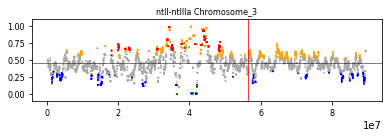

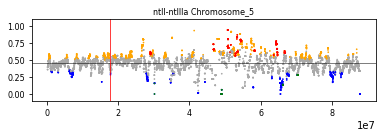

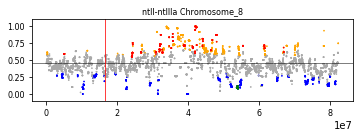

In [12]:
# adding in the location of each of the DE genes

#plot all chromosomes with all the Fst-dxy overlap outliers
    # Chr 3
plt.figure(figsize=(6.27,1.5))
plt.ylim(-0.1,1.1)
title='ntII-ntIIIa Chromosome_3'
plt.title(title, fontsize=8)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 6)
plt.axhline(y=fst['MEAN_FST'].mean(), c='black', linewidth=0.5)
    #add the Fst data with the outliers colored
plt.scatter(fst.loc[fst['CHROM']=='Chromosome_3','MID'],
            fst.loc[fst['CHROM']=='Chromosome_3', 'MEAN_FST'],
            c=fst.loc[fst['CHROM']=='Chromosome_3', 'colout'],s=0.5)
    #add the points with overlap in dxy ontop
plt.scatter(out_overlap.loc[out_overlap['CHROM']=='Chromosome_3','pos'],
            out_overlap.loc[out_overlap['CHROM']=='Chromosome_3','MEAN_FST'],
            c=out_overlap.loc[out_overlap['CHROM']=='Chromosome_3','colout_overlap'],s=0.5)
plt.axvline(x=56339160, c='red', linewidth=0.75)
plt.savefig('Chromosome_3_ntII-ntIIIa_500kb10kb_90missing_mac21_outoverlap_DEgene.png', dpi=1200)

    # Chr 5
plt.figure(figsize=(6.16,1.5))
plt.ylim(-0.1,1.1)
title='ntII-ntIIIa Chromosome_5'
plt.title(title, fontsize=8)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 6)
plt.axhline(y=fst['MEAN_FST'].mean(), c='black', linewidth=0.5)
    #add the Fst data with the outliers colored
plt.scatter(fst.loc[fst['CHROM']=='Chromosome_5','MID'],
            fst.loc[fst['CHROM']=='Chromosome_5', 'MEAN_FST'],
            c=fst.loc[fst['CHROM']=='Chromosome_5', 'colout'],s=0.5)
    #add the points with overlap in dxy ontop
plt.scatter(out_overlap.loc[out_overlap['CHROM']=='Chromosome_5','pos'],
            out_overlap.loc[out_overlap['CHROM']=='Chromosome_5','MEAN_FST'],
            c=out_overlap.loc[out_overlap['CHROM']=='Chromosome_5','colout_overlap'],s=0.5)
plt.axvline(x=17677627, c='red', linewidth=0.75)
plt.savefig('Chromosome_5_ntII-ntIIIa_500kb10kb_90missing_mac21_outoverlap_DEgene.png', dpi=1200)

    # Chr 8
plt.figure(figsize=(5.75,1.5))
plt.ylim(-0.1,1.1)
title='ntII-ntIIIa Chromosome_8'
plt.title(title, fontsize=8)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 6)
plt.axhline(y=fst['MEAN_FST'].mean(), c='black', linewidth=0.5)
    #add the Fst data with the outliers colored
plt.scatter(fst.loc[fst['CHROM']=='Chromosome_8','MID'],
            fst.loc[fst['CHROM']=='Chromosome_8', 'MEAN_FST'],
            c=fst.loc[fst['CHROM']=='Chromosome_8', 'colout'],s=0.5)
    #add the points with overlap in dxy ontop
plt.scatter(out_overlap.loc[out_overlap['CHROM']=='Chromosome_8','pos'],
            out_overlap.loc[out_overlap['CHROM']=='Chromosome_8','MEAN_FST'],
            c=out_overlap.loc[out_overlap['CHROM']=='Chromosome_8','colout_overlap'],s=0.5)
plt.axvline(x=16812396, c='red', linewidth=0.75)
plt.savefig('Chromosome_8_ntII-ntIIIa_500kb10kb_90missing_mac21_outoverlap_DEgene.png', dpi=1200)